# Project: Water Potability Prediction

## Table of Contents
<ul>
<li>Introduction</li>
<li>Data Wrangling</li>
<li>Exploratory Data Analysis</li>
<li>Conclusions</li>
</ul>

## Introduction

Water is the most significant resource of life, crucial for supporting the life of most existing creatures and human beings. Living organisms need water with enough quality to continue their lives. There are certain limits of pollutions that water species can tolerate. Exceeding these limits affects the existence of these creatures and threatens their lives.

As per the United Nations (UN) report, about 1.5 million people die each year because of contaminated water-driven diseases. In developing countries, it is announced that 80% of health problems are caused by contaminated water. Five million deaths and 2.5 billion illnesses are reported annually. Such a mortality rate is higher than deaths resulting from accidents, crimes, and terrorist attacks.

Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.Therefore, it is very important to suggest new approaches to analyze and, if possible, to predict the water quality.

The goal of this project is to train a machine learning algorithm to predict water portability using a number of features.

### Dataset Description

1. ph: pH of 1. water (0 to 14).

2. Hardness: Capacity of water to precipitate soap in mg/L.

3. Solids: Total dissolved solids in ppm.

4. Chloramines: Amount of Chloramines in ppm.

5. Sulfate: Amount of Sulfates dissolved in mg/L.

6. Conductivity: Electrical conductivity of water in μS/cm.

7. Organic_carbon: Amount of organic carbon in ppm.

8. Trihalomethanes: Amount of Trihalomethanes in μg/L.

9. Turbidity: Measure of light emitting property of water in NTU.

10. Potability: Indicates if water is safe for human consumption. Potable - 1 and Not potable - 0

In [1]:
# imporing the necessary libraries
import pandas as pd
import numpy as np
from time import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC

## Data Wrangling

In [2]:
# reading our test data into a pandas dataframe
df_water = pd.read_csv('water_portability_train_dataset.csv')
df_water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,219.674262,22210.613083,5.875041,333.775777,398.517703,11.502316,112.412210,2.994259,0
1,6.783888,193.653581,13677.106441,5.171454,323.728663,477.854687,15.056064,66.396293,3.250022,0
2,6.010618,184.558582,15940.573271,8.165222,421.486089,314.529813,20.314617,83.707938,4.867287,1
3,8.097454,218.992436,18112.284447,6.196947,333.775777,376.569803,17.746264,59.909941,4.279082,1
4,8.072612,210.269780,16843.363927,8.793459,359.516169,559.167574,17.263576,68.738989,5.082206,0


In [3]:
# makeing the column headers lowercase
df_water.columns = (x.lower() for x in df_water.columns)
df_water.columns

Index(['ph', 'hardness', 'solids', 'chloramines', 'sulfate', 'conductivity',
       'organic_carbon', 'trihalomethanes', 'turbidity', 'potability'],
      dtype='object')

In [4]:
# inspecting our dataset
df_water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2293 non-null   float64
 1   hardness         2293 non-null   float64
 2   solids           2293 non-null   float64
 3   chloramines      2293 non-null   float64
 4   sulfate          2293 non-null   float64
 5   conductivity     2293 non-null   float64
 6   organic_carbon   2293 non-null   float64
 7   trihalomethanes  2293 non-null   float64
 8   turbidity        2293 non-null   float64
 9   potability       2293 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 179.3 KB


There are no missing values in our data and all the data types are acculate.

In [5]:
# checkinking the distribution of our features
df_water.describe()

,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
count,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000
mean,7.082265,196.390335,22074.335334,7.132987,333.393347,425.455702,14.229174,66.499518,3.967153,0.390318
std,1.486029,32.460633,8668.693908,1.573879,36.116271,80.266652,3.341429,16.067742,0.788480,0.487928
min,0.000000,47.432000,320.942611,0.530351,180.206746,201.619737,2.200000,0.738000,1.450000,0.000000
25%,6.262799,176.753500,15825.182571,6.140033,316.552791,363.974060,12.015868,56.329076,3.440753,0.000000
50%,7.080795,196.833001,21153.322827,7.135063,333.775777,420.828362,14.151538,66.396293,3.947138,0.000000
75%,7.873272,216.441172,27345.174288,8.104498,349.985243,480.715208,16.450990,77.182622,4.503661,1.000000
max,14.000000,317.338124,56351.396304,13.043806,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


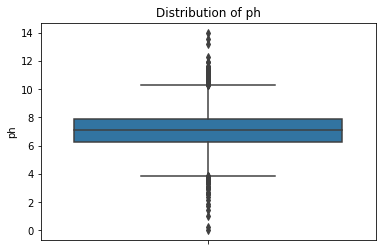

In [6]:
# checking for outliers in the ph
sns.boxplot(y='ph',data=df_water)
plt.title('Distribution of ph');

In [7]:
# dropping outliers in the ph column
drop_high = list(df_water[df_water['ph'] > 11].index)
drop_low = list(df_water[df_water['ph'] < 3].index)
drop = drop_high + drop_low
df_water = df_water.drop(drop,axis=0)

NumExpr defaulting to 8 threads.


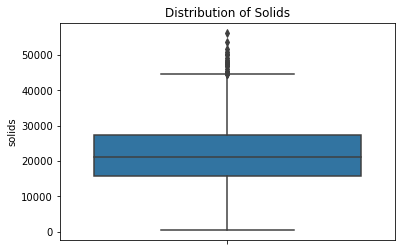

In [8]:
# checking for outliers in the solids column
sns.boxplot(y='solids',data=df_water)
plt.title('Distribution of Solids');

In [9]:
# dropping outliers in the solids column
drop = df_water[df_water['solids'] > 45000].index
df_water = df_water.drop(drop,axis=0)

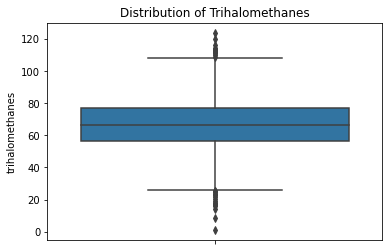

In [10]:
# checking for outliers in the trihalomethanes column
sns.boxplot(y='trihalomethanes',data=df_water)
plt.title('Distribution of Trihalomethanes');

In [11]:
# dropping outliers in the trihalomethanes column
drop_high = list(df_water[df_water['trihalomethanes'] > 110].index)
drop_low = list(df_water[df_water['trihalomethanes'] < 20].index)
drop = drop_high + drop_low
df_water = df_water.drop(drop,axis=0)

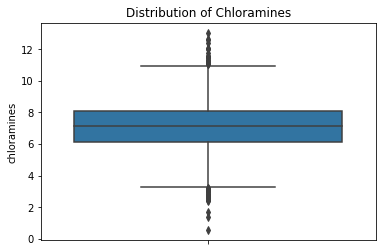

In [12]:
# checking for outliers in the chloramines column
sns.boxplot(y='chloramines',data=df_water)
plt.title('Distribution of Chloramines');

In [13]:
# dropping outliers in the solids column
drop_high = list(df_water[df_water['chloramines'] > 11.5].index)
drop_low = list(df_water[df_water['chloramines'] < 2.5].index)
drop = drop_high + drop_low
df_water = df_water.drop(drop,axis=0)

In [14]:
# checkinking the distribution of our features
df_water.describe()

,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
count,2196.000000,2196.000000,2196.000000,2196.000000,2196.000000,2196.000000,2196.000000,2196.000000,2196.000000,2196.000000
mean,7.080537,196.597590,21771.743398,7.125692,333.791121,425.557824,14.243348,66.525095,3.964304,0.389344
std,1.346843,31.906084,8206.794933,1.503078,35.542079,80.302903,3.347068,15.417016,0.790399,0.487713
min,3.148712,81.710895,320.942611,2.562255,187.170714,201.619737,2.200000,20.337753,1.450000,0.000000
25%,6.303765,176.943694,15764.807880,6.155225,317.005599,363.841053,12.037353,56.483416,3.438196,0.000000
50%,7.080795,197.063450,21043.914796,7.130932,333.775777,420.944344,14.171087,66.396293,3.940839,0.000000
75%,7.834716,216.299188,27073.406144,8.086948,350.207431,481.324545,16.490887,77.138651,4.501133,1.000000
max,10.947473,317.338124,44982.734155,11.448469,481.030642,753.342620,28.300000,108.589414,6.739000,1.000000


## Exploratory Data Analysis

We will be performing univariate and bivariate EDA on our dataset to see how our features are distributed and see how they they affect our taget variable (potability)

In [15]:
# setting base color for our plots
base_color = sns.color_palette()[0]
# setting style for our plots
sns.set_style('whitegrid')

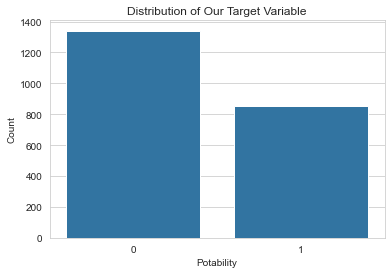

In [16]:
# checking for distribution in our target variable
order = df_water.potability.value_counts().index
sns.countplot(x='potability',data=df_water,color=base_color,order=order)
plt.title('Distribution of Our Target Variable')
plt.xlabel('Potability')
plt.ylabel('Count');

We can see that our target variable is not evenly distributed. We are going to have to balance it before training our model.

In [17]:
# define a function to make histograms and violin plots
def HistViolinPlot(col,title,data=df_water):
    fig = plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    plt.hist(x=col,data=data)
    plt.title(title)
    plt.xlabel(col)
    plt.ylabel("Count")
    
    plt.subplot(1,2,2)
    sns.violinplot(y=col,data=data,inner="quartile")
    plt.title(title)
    return plt.show()

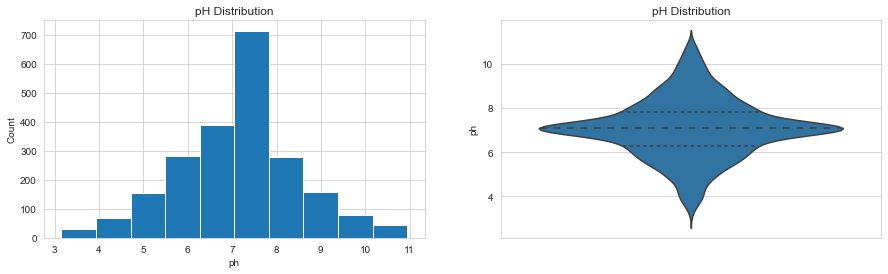

In [18]:
# checking the distribution of our ph
HistViolinPlot('ph','pH Distribution',data=df_water)

We can see of pH values have a unimodal distribution with most of our values in the 7 to 8 range. With a few outliers.

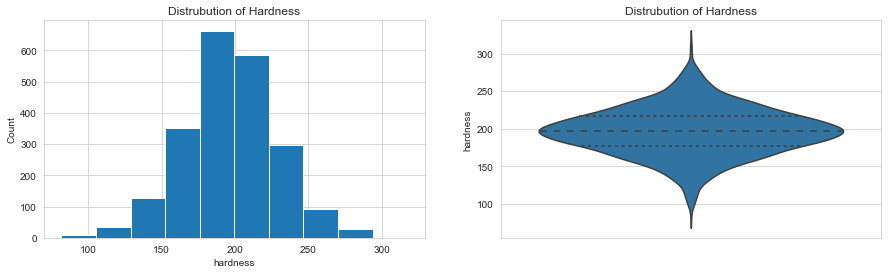

In [19]:
# checking the distribution of hardness
HistViolinPlot('hardness','Distrubution of Hardness',data=df_water)

Our hardness column has a normal distribution with most of the values around 200, this coulmn also has alot of outliers.

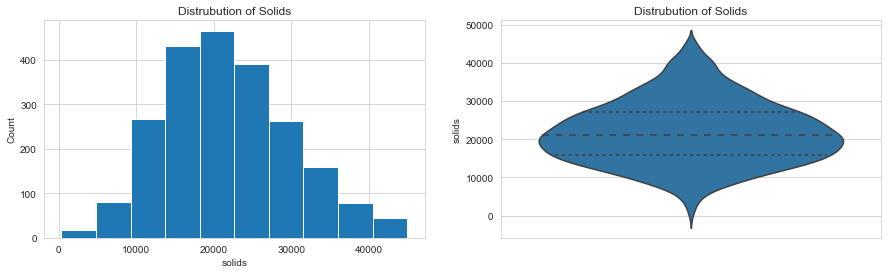

In [20]:
# checking distribution of values in the solids column
HistViolinPlot('solids','Distrubution of Solids',data=df_water)

Our solids column has a right-skewed distribution 

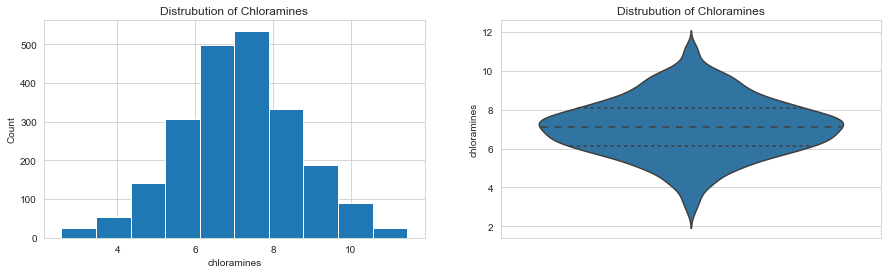

In [21]:
# checking distribution of values in the chloramines column
HistViolinPlot('chloramines','Distrubution of Chloramines',data=df_water)

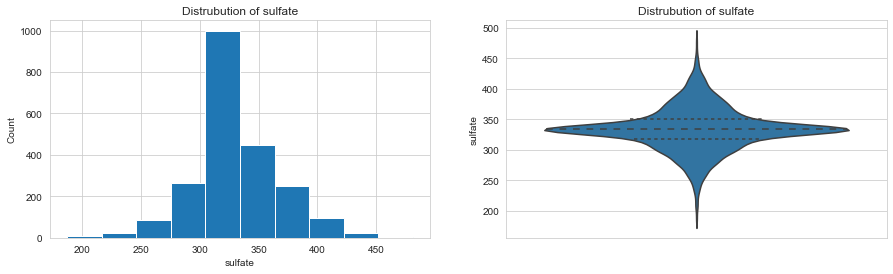

In [22]:
# checking distribution of values in the chloramines column
HistViolinPlot('sulfate','Distrubution of sulfate',data=df_water)

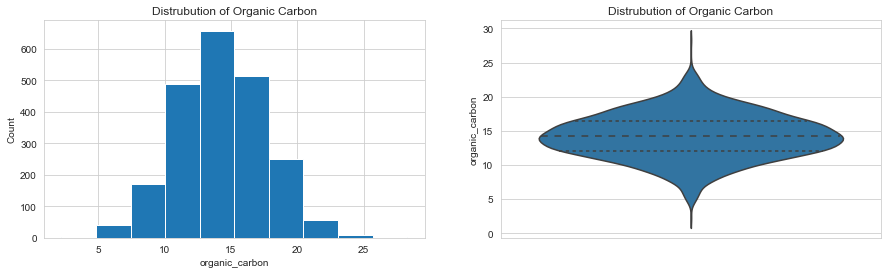

In [23]:
# checking distribution of values in the organic carbon columnx
HistViolinPlot('organic_carbon','Distrubution of Organic Carbon',data=df_water)

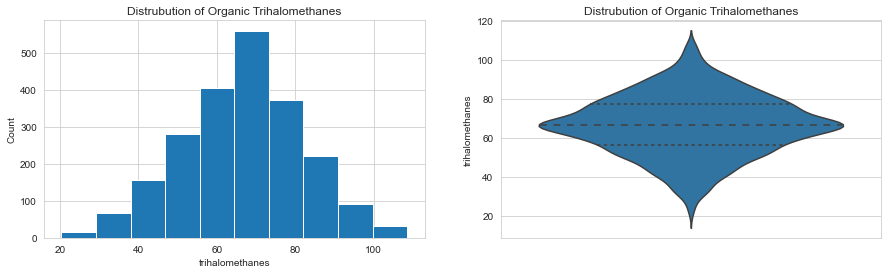

In [24]:
# checking distribution of values in the trihalomethanes columnx
HistViolinPlot('trihalomethanes','Distrubution of Organic Trihalomethanes',data=df_water)

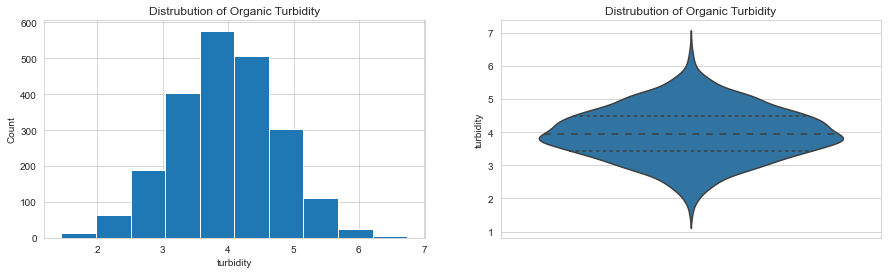

In [25]:
# checking distribution of values in the turbidity column
HistViolinPlot('turbidity','Distrubution of Organic Turbidity',data=df_water)

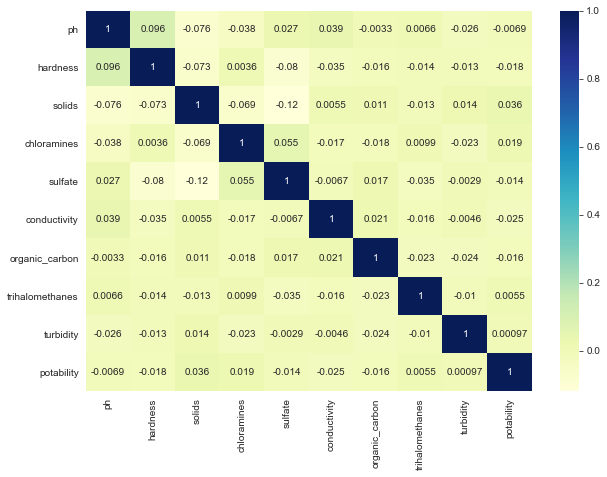

In [26]:
# using a heatmap to check for the variables with the higest corrolation with the target variable
plt.figure(figsize=(10,7))
sns.heatmap(df_water.corr(),cmap="YlGnBu",annot=True);

None of our features have high correlation with our target variable.

### Conclutions From EDA

* None of our features have high correlation with our target variable
* Our target variable is unbalanced 

### Model Traing and Evaluation

#### Spliting our Dataset into Test and Train, Balancing our Dataset by Oversampling and Scaling our Numeric Variables

In [27]:
# split the features from our target variable
y = df_water['potability']
X = df_water.drop('potability',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
print(f'X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}, y_test: {y_test.shape}')

X_train: (1756, 9), y_train: (1756,)
X_test: (440, 9), y_test: (440,)


In [28]:
#checking the distribution of our target variable
y_train.value_counts()

0    1072
1     684
Name: potability, dtype: int64

In [29]:
#Oversampling the data
oversample = SMOTE(random_state = 10)
X_train_oversampled, y_train_oversampled = oversample.fit_resample(X_train,y_train)
y_train_oversampled.value_counts()

0    1072
1    1072
Name: potability, dtype: int64

In [30]:
# scaling our data with StandardScaler
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train_oversampled)
X_test_scaled = scale.transform(X_test)

### SVM

In [31]:
# create our classifier object and train the algorithm
clf = SVC()
clf.fit(X_train_scaled,y_train_oversampled)

SVC()

In [32]:
# make predinctions on the test set
pred = clf.predict(X_test_scaled)

In [33]:
# evaluate or model
accuracy_score(y_test, pred)

0.5931818181818181

### Decision Tree Classifier

In [34]:
# create our classifier object and train the algorithm
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled,y_train_oversampled)

DecisionTreeClassifier()

In [35]:
# make predinctions on the test set
y_pred = dt.predict(X_test_scaled)

In [36]:
# evaluate or model
accuracy_score(y_test, y_pred)

0.5909090909090909

### Logistic Regression

In [37]:
# create our classifier object and train the algorithm
lr = LogisticRegression()
lr.fit(X_train_scaled,y_train_oversampled)

LogisticRegression()

In [38]:
# make predinctions on the test set
y_hat = lr.predict(X_test_scaled)

In [39]:
# evaluate or model
accuracy_score(y_test, y_hat)

0.4909090909090909

## GaussianNB

In [40]:
# create a classifier object
gnb = GaussianNB()
gnb.fit(X_train_scaled,y_train_oversampled)

GaussianNB()

In [41]:
pred = gnb.predict(X_test_scaled)

In [42]:
# evaluate or model
accuracy_score(y_test, pred)

0.5272727272727272

## Random Forest Classifier

In [43]:
clf = RandomForestClassifier()
clf.fit(X_train_scaled,y_train_oversampled)

RandomForestClassifier()

In [44]:
# make predinctions on the test set
pred = clf.predict(X_test_scaled)

In [45]:
# evaluate or model
accuracy_score(y_test, pred)

0.625

In [ ]:
# trying to improve the accuracy of our prediction with hyperparameter tuning
